# Churn model

In [54]:
import numpy as np
import pandas as pd

In [82]:
churn_df = pd.read_csv('subscribers_update.csv')
churn_df.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn,convert,Unnamed: 34
0,162502,21724479,economy,0,comedy,access to exclusive content,27.997724,2,NaN,False,...,14,True,1,2020/2/7 21:44,2020/6/7 21:44,NaN,True,0,1,1.0
1,380374,23383224,base,0,comedy,access to exclusive content,22.951579,2,70.0,False,...,14,True,1,2020/3/15 15:44,2020/7/15 15:44,NaN,True,0,1,NaN
2,496617,26844789,enhanced,3,regional,replace OTT,36.001186,2,25.0,True,...,14,False,0,NaN,NaN,NaN,True,1,0,NaN
3,356799,29417030,base,0,drama,replace OTT,20.051667,2,30.0,False,...,14,False,0,NaN,NaN,NaN,True,1,0,NaN
4,681701,26723159,base,4,comedy,replace OTT,22.951579,3,28.0,False,...,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True,0,1,NaN


In [83]:
churn_df = churn_df.dropna(subset=['preferred_genre', 'age','male_TF','package_type','intended_use','weekly_consumption_hour','attribution_survey'])

In [84]:
churn_df['num_ideal_streaming_services'].fillna(churn_df['num_ideal_streaming_services'].mean(),inplace=True)

In [85]:
churn_df['num_weekly_services_utilized'].fillna(0,inplace=True)

In [86]:
churn_df.isnull().sum(axis=0)

Unnamed: 0                           0
subid                                0
package_type                         0
num_weekly_services_utilized         0
preferred_genre                      0
intended_use                         0
weekly_consumption_hour              0
num_ideal_streaming_services         0
age                                  0
male_TF                              0
country                              0
attribution_technical                0
attribution_survey                   0
op_sys                           12843
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
account_creation_date1               0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                             0
language                             0
payment_type                    133482
num_trial_days           

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn import linear_model
from sklearn import model_selection as cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [231]:
data = churn_df.drop(['Unnamed: 0','subid','country','account_creation_date','account_creation_date1','trial_end_date','initial_credit_card_declined','monthly_price','months_per_bill_period',
                          'language','payment_type','num_trial_days','current_sub_TF','last_payment','next_payment','cancel_date','convert',"Unnamed: 34"],axis=1)

In [232]:
data.head()

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,attribution_survey,op_sys,plan_type,discount_price,join_fee,payment_period,trial_completed,churn
1,base,0,comedy,access to exclusive content,22.951579,2,70.0,False,facebook,facebook,NaN,base_uae_14_day_trial,4.5141,0.3303,1,True,0
2,enhanced,3,regional,replace OTT,36.001186,2,25.0,True,organic,facebook,iOS,base_uae_14_day_trial,4.5141,0.1101,0,True,1
3,base,0,drama,replace OTT,20.051667,2,30.0,False,search,tv,Android,base_uae_14_day_trial,4.5141,0.0367,0,True,1
4,base,4,comedy,replace OTT,22.951579,3,28.0,False,discovery,youtube,iOS,base_uae_14_day_trial,4.5141,0.0367,2,True,0
5,base,0,comedy,access to exclusive content,20.051667,2,70.0,False,bing,tv,NaN,base_uae_14_day_trial,4.5141,0.3303,1,True,0


In [154]:
cor = data.corr()
cor

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,discount_price,join_fee,payment_period,trial_completed,churn
num_weekly_services_utilized,1.000000,0.113840,0.353427,-0.040666,-0.005825,0.005499,0.126323,0.051875,-0.107855
weekly_consumption_hour,0.113840,1.000000,0.056828,-0.044880,-0.005216,0.035191,0.097166,0.054229,-0.100500
num_ideal_streaming_services,0.353427,0.056828,1.000000,-0.023025,-0.004738,0.004804,0.129651,0.053449,-0.113732
age,-0.040666,-0.044880,-0.023025,1.000000,-0.000195,0.154796,-0.221261,-0.109647,0.222253
discount_price,-0.005825,-0.005216,-0.004738,-0.000195,1.000000,-0.016578,0.022365,0.003146,-0.003925
join_fee,0.005499,0.035191,0.004804,0.154796,-0.016578,1.000000,-0.124279,0.013236,-0.044229
payment_period,0.126323,0.097166,0.129651,-0.221261,0.022365,-0.124279,1.000000,0.368469,-0.825707
trial_completed,0.051875,0.054229,0.053449,-0.109647,0.003146,0.013236,0.368469,1.000000,-0.395109
churn,-0.107855,-0.100500,-0.113732,0.222253,-0.003925,-0.044229,-0.825707,-0.395109,1.000000


In [159]:
cor_target = abs(data["churn"])
cor_target

1         0
2         1
3         1
4         0
5         0
         ..
226670    0
226671    0
226672    0
226673    0
226675    1
Name: churn, Length: 188901, dtype: int64

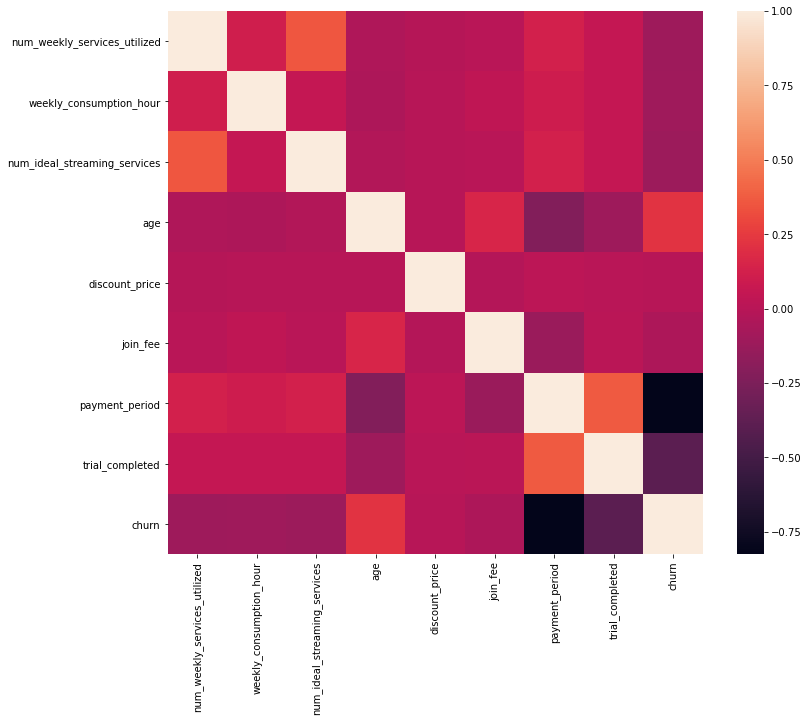

In [160]:
plt.figure(figsize=(12,10))
sns.heatmap(cor)
plt.show()

In [162]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

2         1
3         1
9         1
10        1
12        1
         ..
226658    1
226661    1
226662    1
226666    1
226675    1
Name: churn, Length: 90988, dtype: int64

In [163]:
data = pd.get_dummies(data,columns = ['package_type','preferred_genre','intended_use','male_TF','plan_type','attribution_technical','attribution_survey','op_sys'
                                           ,'plan_type','discount_price','trial_completed'])

In [188]:
import xgboost
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression as lr
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve

# Logistic Regression

In [164]:
feature_x = [tag for tag in data.columns if tag not in ['churn','payment_period']]

In [165]:
X = data[feature_x].values
y = data['churn']

# training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [209]:
lr = LogisticRegression(random_state=2020,tol=1e-6) 
lr.fit(X_train, y_train)
lr_y_proba=lr.predict_proba(X_test)
lr_y_pre=lr.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [235]:
Churn = lr.predict_proba(X)[:,1]
Churn

array([0.28186399, 0.77052539, 0.95110205, ..., 0.07261609, 0.09206526,
       0.99951264])

In [236]:
churn = churn_df.drop(['Unnamed: 0','subid','country','account_creation_date','account_creation_date1','trial_end_date','initial_credit_card_declined','monthly_price','months_per_bill_period',
                          'language','payment_type','num_trial_days','current_sub_TF','last_payment','next_payment','cancel_date','convert',"Unnamed: 34"],axis=1)

In [237]:
churn['churn'] = Churn

In [238]:
churn.to_csv('churn.csv')

In [210]:
lr_score = lr.score(X_test, y_test)
lr_accuracy_score=accuracy_score(y_test,lr_y_pre)
lr_preci_score=precision_score(y_test,lr_y_pre)
lr_recall_score=recall_score(y_test,lr_y_pre)
lr_f1_score=f1_score(y_test,lr_y_pre)
lr_auc=roc_auc_score(y_test,lr_y_proba[:,1])
print('lr_accuracy_score: %f,lr_preci_score: %f,lr_recall_score: %f,lr_f1_score: %f,lr_auc: %f'
      %(lr_accuracy_score,lr_preci_score,lr_recall_score,lr_f1_score,lr_auc))

lr_accuracy_score: 0.849782,lr_preci_score: 0.860915,lr_recall_score: 0.821406,lr_f1_score: 0.840697,lr_auc: 0.922932


In [224]:
lr_y_proba[:,1]

array([0.31450028, 0.30202626, 0.02680251, ..., 0.92201904, 0.13306432,
       0.01636821])

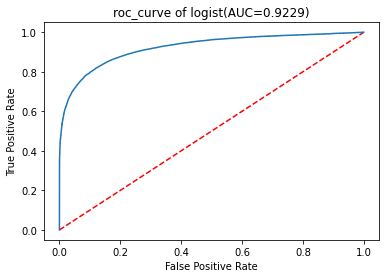

In [211]:
lr_fpr,lr_tpr,lr_threasholds=roc_curve(y_test,lr_y_proba[:,1]) # 计算ROC的值,lr_threasholds为阈值
plt.title("roc_curve of %s(AUC=%.4f)" %('logist',lr_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.plot(lr_fpr,lr_tpr)
plt.show()

# Decision Tree

In [212]:
tr = DecisionTreeClassifier(random_state=2020)  # 决策树模型
tr.fit(X_train, y_train)
tr_y_pre=tr.predict(X_test)
tr_y_proba=tr.predict_proba(X_test)

In [213]:
tr_score = tr.score(X_test, y_test)
tr_accuracy_score=accuracy_score(y_test,tr_y_pre)
tr_preci_score=precision_score(y_test,tr_y_pre)
tr_recall_score=recall_score(y_test,tr_y_pre)
tr_f1_score=f1_score(y_test,tr_y_pre)
tr_auc=roc_auc_score(y_test,tr_y_proba[:,1])
print('tr_accuracy_score: %f,tr_preci_score: %f,tr_recall_score: %f,tr_f1_score: %f,tr_auc: %f'
       %(tr_accuracy_score,tr_preci_score,tr_recall_score,tr_f1_score,tr_auc))

tr_accuracy_score: 0.809162,tr_preci_score: 0.802850,tr_recall_score: 0.801294,tr_f1_score: 0.802072,tr_auc: 0.810911


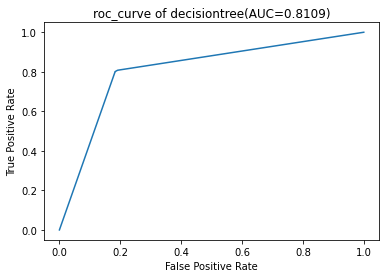

In [214]:
tr_fpr,tr_tpr,tr_threasholds=roc_curve(y_test,tr_y_proba[:,1]) # 计算ROC的值,lr_threasholds为阈值
plt.title("roc_curve of %s(AUC=%.4f)" %('decisiontree',tr_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(tr_fpr,tr_tpr)
plt.show()

# XGBoost

In [179]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [169]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.353865226584014
